In [1]:
from google.colab import drive
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow_hub.keras_layer import KerasLayer
from PIL import Image
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# downgrade tensorflow version to 2.15
!pip install --upgrade "tensorflow<2.16" "tf-keras<2.16"

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
model_path = '/content/drive/MyDrive/GC7/model_tl_do.h5'


In [5]:
model = load_model(model_path, custom_objects={'KerasLayer' : KerasLayer})

# Data Inference

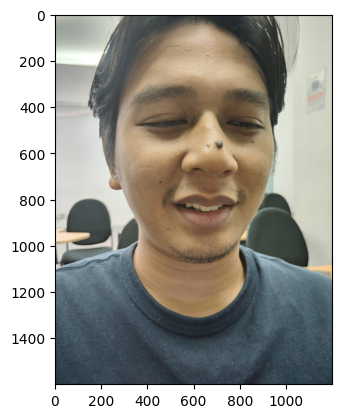

1/1 [==============================] - 0s 481ms/step


'Prediction: oily'

In [7]:
# set path
path_to_image = '/content/drive/MyDrive/GC7/inference.jpeg'

# read
image = Image.open(path_to_image)

# show image
plt.imshow(image)
plt.show()

# function to load and predict
def import_and_predict(path, model):
        image = load_img(path, target_size=(224, 224))
        img_array = img_to_array(image)
        img_array = tf.expand_dims(img_array, 0)  # Create a batch

        # Normalize the image
        img_array = img_array / 255.0

        # Make prediction
        predictions = model.predict(img_array)

        # Get the class with the highest probability
        idx = np.argmax(predictions)

        jenis = ['oily', 'normal', 'dry']
        result = f"Prediction: {jenis[idx]}"

        return result
import_and_predict(path_to_image, model)